# TMNIST Alphabet Character Recognition: A Comprehensive Tutorial
> By Deepakraja Rajendran
>
> Created: March 21, 2025

## Introduction
This tutorial will guide you through building a deep learning model to recognize typographic characters from the TMNIST Alphabet dataset, which contains 94 different characters and over 281,000 images. This dataset is similar to the traditional MNIST handwritten digit dataset but focuses on typography rather than handwriting.

The TMNIST (Typography MNIST) dataset provides a more challenging task than the original MNIST as it includes not just digits but also uppercase and lowercase letters and special characters. In this tutorial, we'll aim to achieve at least 90% accuracy in classifying these 94 different characters.

## Table of Contents
1. [Understanding the TMNIST Dataset](#understanding-the-tmnist-dataset)
2. [Setting Up the Environment](#setting-up-the-environment)
3. [Loading and Exploring the Dataset](#loading-and-exploring-the-dataset)
4. [Data Preprocessing](#data-preprocessing)
5. [Building Our Neural Network Architecture](#building-our-neural-network-architecture)
6. [Mathematics Behind Convolutional Neural Networks](#mathematics-behind-cnns)
7. [Training the Model](#training-the-model)
8. [Evaluating Model Performance](#evaluating-model-performance)
9. [Visualizing Results](#visualizing-results)
10. [Model Improvements and Fine-tuning](#model-improvements)
11. [Conclusion](#conclusion)


## 1. Understanding the TMNIST Dataset <a name="understanding-the-tmnist-dataset"></a>

The TMNIST Alphabet dataset consists of 94 different typographic characters, which includes:
- 26 uppercase letters (A-Z)
- 26 lowercase letters (a-z)
- 10 digits (0-9)
- 32 special characters (punctuation, symbols, etc.)

Each image is a grayscale 28×28 pixel image, similar to the traditional MNIST format. What makes this dataset different is that we're dealing with typographic (font-based) characters rather than handwritten ones.

## 2. Setting Up the Environment <a name="setting-up-the-environment"></a>

Let's start by importing the necessary libraries:

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import cv2
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv


In [2]:
# Deep learning libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

In [3]:
#Import ingnore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [5]:
# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  2


## 3. Loading and Exploring the Dataset

In [6]:
# Locate the dataset path
tmnist_files = [f for f in os.listdir('/kaggle/input/tmnist-alphabet-94-characters') if f.endswith('.csv')]
if tmnist_files:
    data_path = f'/kaggle/input/tmnist-alphabet-94-characters/{tmnist_files[0]}'
    print(f"Loading dataset from: {data_path}")
else:
    data_path = '/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv'
    print(f"Using default path: {data_path}")

Loading dataset from: /kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv


In [7]:
# Load the dataset
tmnist_data = pd.read_csv(data_path)
print(f"Dataset shape: {tmnist_data.shape}")

Dataset shape: (274093, 786)


In [8]:
# Check the first few rows
print(tmnist_data.head())

                  names labels    1    2    3    4    5    6    7    8  ...  \
0         Salsa-Regular      6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1  MouseMemoirs-Regular      D  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2     Creepster-Regular      f  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3     SeoulNamsan-Light      /  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4  HachiMaruPop-Regular      F  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

   775  776  777  778  779  780  781  782  783  784  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 786 columns]


In [9]:
# Check data types
print("\nData types:")
print(tmnist_data.dtypes.head(10))


Data types:
names      object
labels     object
1         float64
2         float64
3         float64
4         float64
5         float64
6         float64
7         float64
8         float64
dtype: object


In [10]:
# Get a list of all unique labels
unique_labels = tmnist_data['labels'].unique()
print(f"Number of unique characters: {len(unique_labels)}")
print(f"Sample of unique characters: {unique_labels[:20]}")

Number of unique characters: 94
Sample of unique characters: ['6' 'D' 'f' '/' 'F' 'x' 'J' '8' 'H' 'k' '@' '1' '=' 'g' ')' '2' 'd' '^'
 '3' 't']


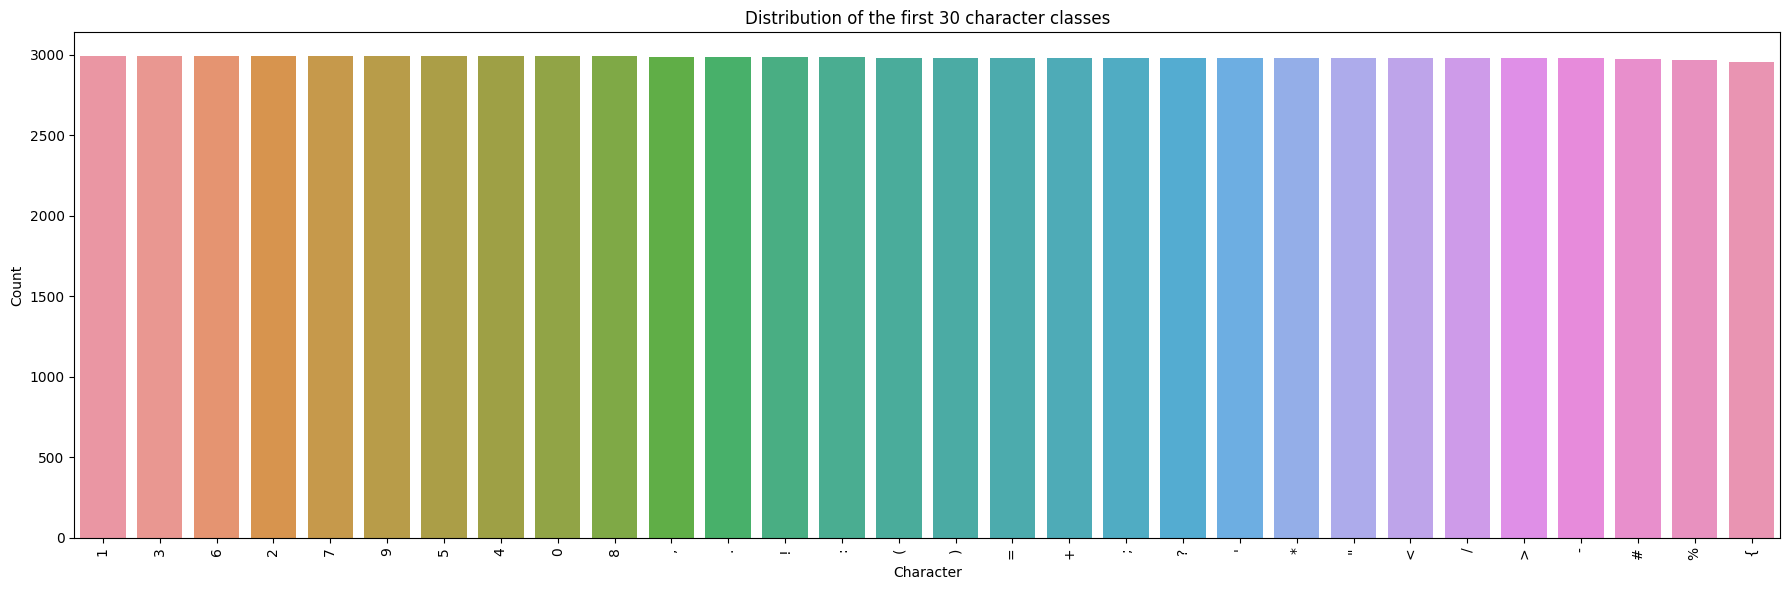

In [11]:
# Check distribution of characters
plt.figure(figsize=(18, 6))
label_counts = tmnist_data['labels'].value_counts()
sns.barplot(x=label_counts.index[:30], y=label_counts.values[:30])
plt.title('Distribution of the first 30 character classes')
plt.xlabel('Character')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [12]:
# Check if there are any non-zero pixel values
non_zero_count = (tmnist_data.iloc[:, 2:] != 0).sum().sum()
print(f"Number of non-zero pixel values: {non_zero_count}")

Number of non-zero pixel values: 48094638


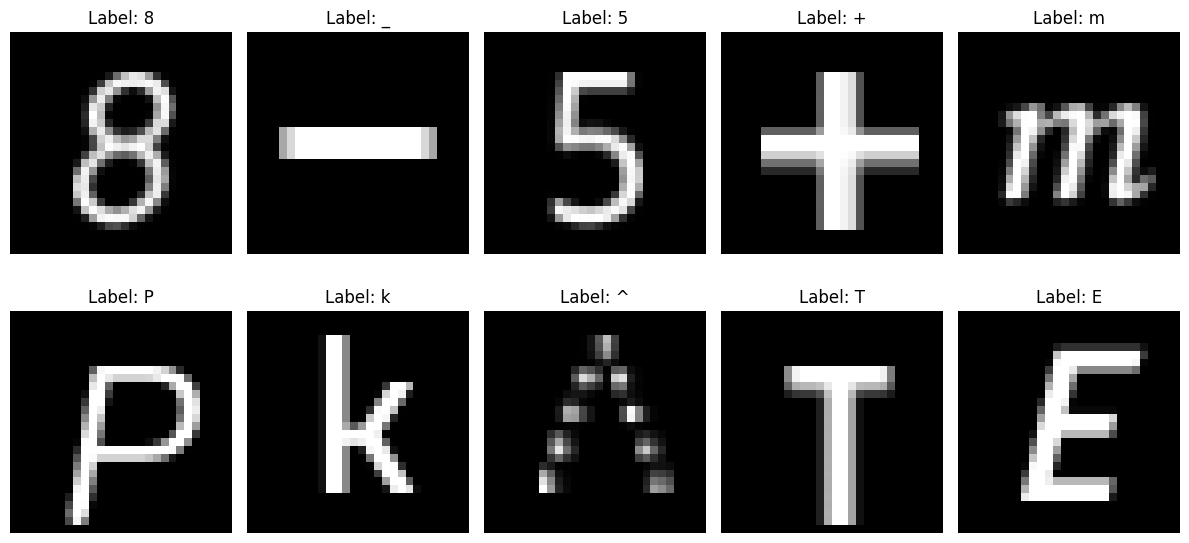

In [13]:
# Display a few random sample images
random_indices = random.sample(range(len(tmnist_data)), 10)
plt.figure(figsize=(12, 6))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i+1)
    # Convert values to float and reshape
    img = tmnist_data.iloc[idx, 2:].astype(float).values.reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {tmnist_data.iloc[idx, 1]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

This image shows a visualization of the TMNIST dataset sample, displaying a variety of characters that your model is trained to recognize.
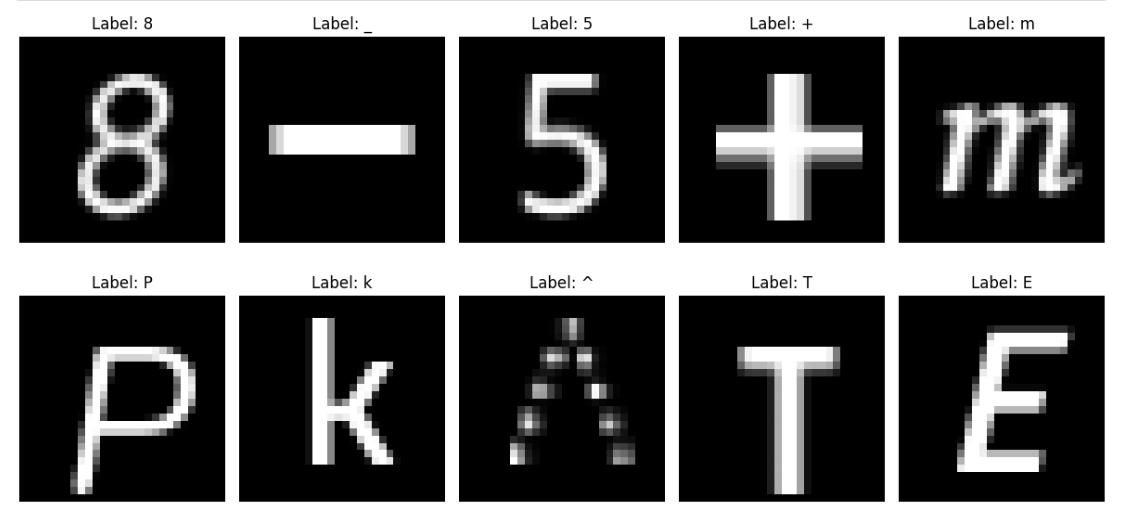

## 4. Data Preprocessing
Now, let's preprocess the data:

In [14]:
# Use a subset of the data to speed up training
sample_size = 30000
if len(tmnist_data) > sample_size:
    tmnist_subset = tmnist_data.sample(sample_size, random_state=42)
else:
    tmnist_subset = tmnist_data

print(f"Working with {len(tmnist_subset)} samples")

Working with 30000 samples


In [15]:
# Split the data into features and labels
X = tmnist_subset.iloc[:, 2:].astype(float).values
y = tmnist_subset['labels'].values

In [16]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (24000, 784)
X_test shape: (6000, 784)


In [17]:
# Normalize pixel values to range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data to 28x28 images (required for CNN)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("Training data shape after reshape:", X_train.shape)
print("Testing data shape after reshape:", X_test.shape)

Training data shape after reshape: (24000, 28, 28, 1)
Testing data shape after reshape: (6000, 28, 28, 1)


In [18]:
# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert encoded labels to one-hot encoding
num_classes = len(label_encoder.classes_)
y_train_onehot = to_categorical(y_train_encoded, num_classes)
y_test_onehot = to_categorical(y_test_encoded, num_classes)

print(f"Number of classes: {num_classes}")
print(f"One-hot encoded label shape: {y_train_onehot.shape}")

Number of classes: 94
One-hot encoded label shape: (24000, 94)


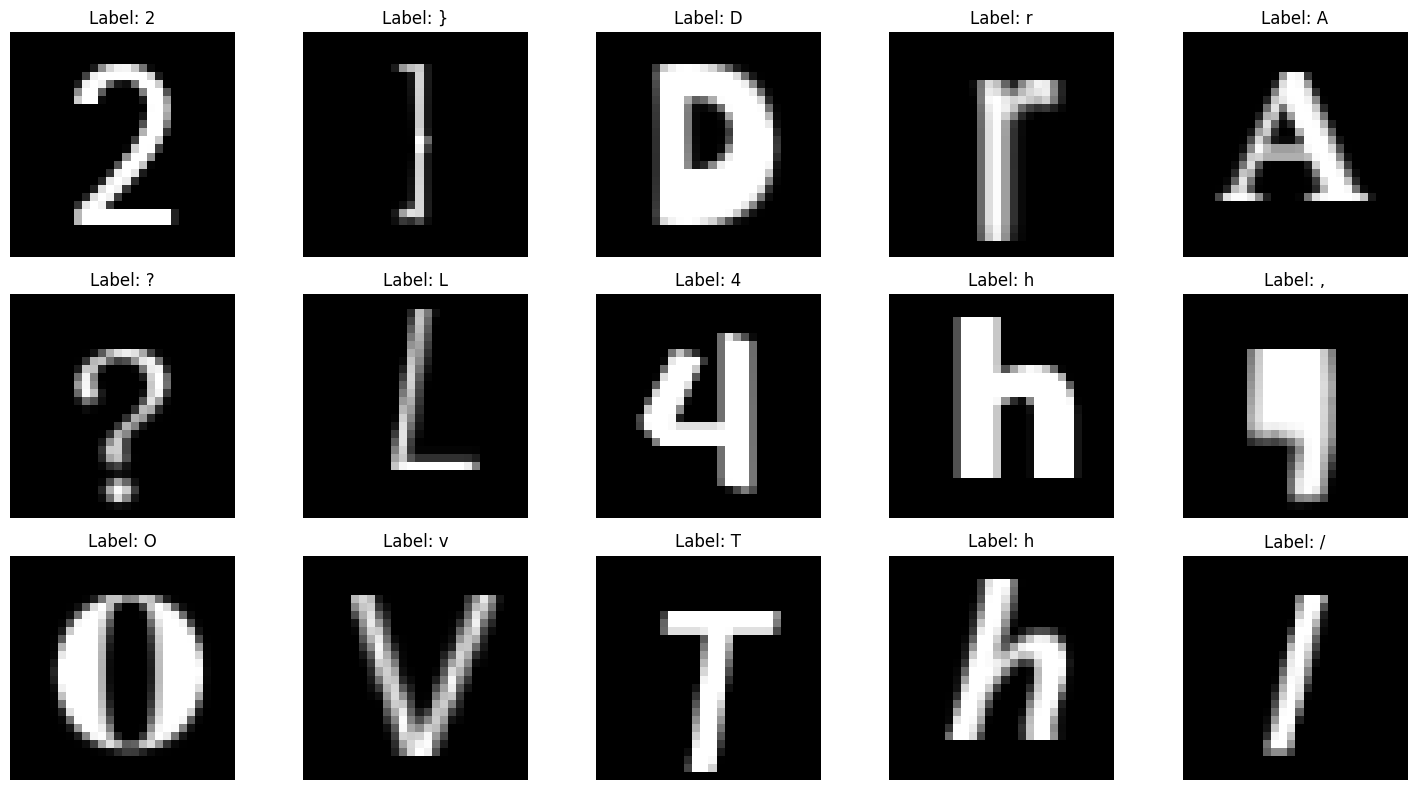

In [19]:
# Create a mapping from encoded indices to original characters
idx_to_char = {i: char for i, char in enumerate(label_encoder.classes_)}
char_to_idx = {char: i for i, char in enumerate(label_encoder.classes_)}

# Display a few images with their labels
plt.figure(figsize=(15, 8))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    class_idx = np.argmax(y_train_onehot[i])
    plt.title(f"Label: {idx_to_char[class_idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [20]:
# Data augmentation for training
datagen = ImageDataGenerator(
    rotation_range=15,  # Rotate images by up to 10 degrees
    zoom_range=0.15,     # Zoom in/out by up to 10%
    width_shift_range=0.15,  # Shift horizontally by up to 10%
    height_shift_range=0.15, # Shift vertically by up to 10%
    shear_range=0.15,       # Shear by up to 10%
    fill_mode='nearest'    # Fill points outside boundaries with nearest values
)


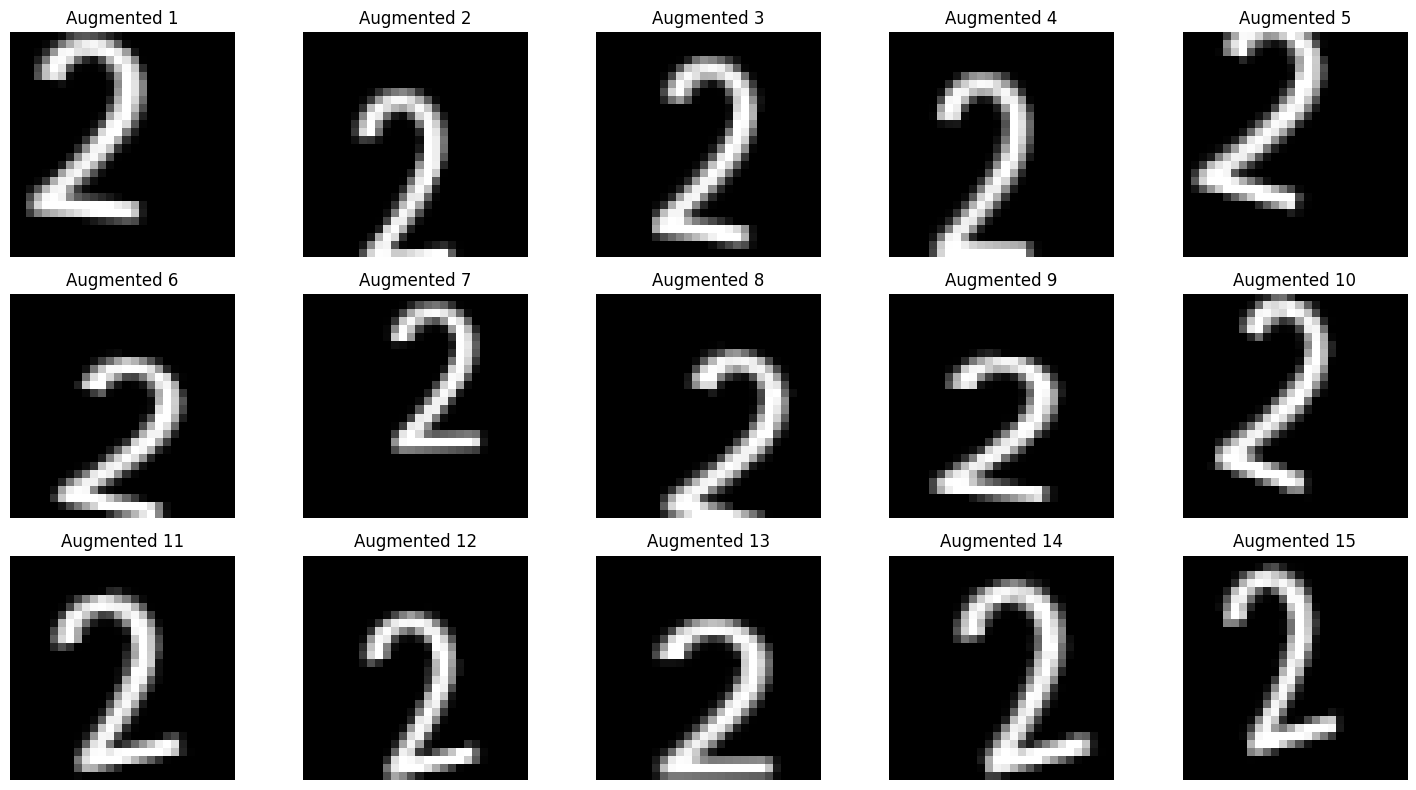

In [21]:
# Visualize augmented images
plt.figure(figsize=(15, 8))
example_image = X_train[0].reshape(1, 28, 28, 1)
it = datagen.flow(example_image, batch_size=1)
for i in range(15):
    plt.subplot(3, 5, i+1)
    batch = next(it)
    image = batch[0].reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f"Augmented {i+1}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## 5. Building Our Neural Network Architecture <a name="building-our-neural-network-architecture"></a>
Let's create a Convolutional Neural Network (CNN) architecture that can effectively classify the typographic characters:


In [22]:
# Create a function to build our CNN model
def build_model(input_shape=(28, 28, 1), num_classes=94):
    """
    Build a CNN model for TMNIST character recognition
    
    Args:
        input_shape: Shape of the input images
        num_classes: Number of character classes to predict
        
    Returns:
        A compiled Keras model
    """
    # Input layer
    inputs = Input(shape=input_shape)
    
    # First convolutional block
    x = Conv2D(48, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(48, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    
    # Second convolutional block
    x = Conv2D(96, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(96, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    
    # Third convolutional block
    x = Conv2D(192, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(192, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    
    # Flatten and dense layers
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    
    # Output layer
    outputs = Dense(num_classes, activation='softmax')(x)
    
    # Create and compile model
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [23]:
# Create the model
model = build_model(input_shape=(28, 28, 1), num_classes=num_classes)

In [24]:
# Display the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 48)          │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 48)          │             192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 48)          │          20,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 48)          │             192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 96)          │          41,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 96)          │          83,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 192)           │         166,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 7, 7, 192)           │             768 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 192)           │         331,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 7, 7, 192)           │             768 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 192)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,690,414 (6.45 MB)

 Trainable params: 1,687,534 (6.44 MB)

 Non-trainable params: 2,880 (11.25 KB)

## 6. Mathematics Behind Convolutional Neural Networks <a name="mathematics-behind-cnns"></a>

Let's understand the mathematical foundations of CNNs that make them effective for image recognition:

### 6.1 Convolution Operation

The core operation in a CNN is the convolution, which is mathematically defined as:

$$(f * g)(t) = \int_{-\infty}^{\infty} f(\tau) g(t - \tau) d\tau$$

In the discrete 2D case (as with images), the convolution is:

$$(I * K)(i, j) = \sum_{m} \sum_{n} I(i-m, j-n) K(m, n)$$

Where:
- $I$ is the input image
- $K$ is the kernel/filter
- $i, j$ are the coordinates in the output feature map

In our CNN, we use multiple filters to extract different features. Each filter is a set of learnable weights that the model adjusts during training.

### 6.2 Activation Functions

After each convolution, we apply the ReLU (Rectified Linear Unit) activation function:

$$f(x) = \max(0, x)$$

This introduces non-linearity into the model, allowing it to learn more complex patterns.

### 6.3 Pooling

Pooling operations reduce the spatial dimensions of the data. Max pooling, which we use in our model, takes the maximum value in each pooling window:

$$MaxPool(i, j) = \max_{m,n \in R_{ij}} x_{m,n}$$

Where $R_{ij}$ is the region centered at position $(i,j)$.

### 6.4 Batch Normalization

Batch normalization normalizes the activations of the previous layer for each batch:

$$\hat{x}_i = \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}$$

Where:
- $\mu_B$ is the batch mean
- $\sigma_B^2$ is the batch variance
- $\epsilon$ is a small constant for numerical stability

This helps with faster training and reduces the risk of overfitting.

### 6.5 Softmax Function

In the output layer, we use the softmax function to convert logits into probabilities:

$$\sigma(z)_j = \frac{e^{z_j}}{\sum_{k=1}^{K} e^{z_k}}$$

Where:
- $z$ is the vector of logits
- $K$ is the number of classes

### 6.6 Categorical Cross-Entropy Loss

For training, we minimize the categorical cross-entropy loss:

$$L = -\sum_{i=1}^{N} \sum_{j=1}^{K} y_{ij} \log(p_{ij})$$

Where:
- $N$ is the number of samples
- $K$ is the number of classes
- $y_{ij}$ is 1 if sample $i$ belongs to class $j$ and 0 otherwise
- $p_{ij}$ is the predicted probability that sample $i$ belongs to class $j$

## 7. Training the Model <a name="training-the-model"></a>

Now, let's train our CNN model with the preprocessed data:

In [25]:
# Define callbacks for training
checkpoint = ModelCheckpoint(
    'best_tmnist_model.keras',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=15,
    verbose=1,
    mode='max',
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.1,
    patience=5,
    verbose=1,
    min_lr=0.00001
)

callbacks = [checkpoint, early_stopping, reduce_lr]

# Train the model with data augmentation
batch_size = 128
epochs = 40  # Reduced for faster execution

# Create a generator with shuffle=True and properly configured
train_generator = datagen.flow(
    X_train, 
    y_train_onehot, 
    batch_size=batch_size,
    shuffle=True
)

# Update the fit method to use the generator more effectively
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test_onehot),
    callbacks=callbacks,
    verbose=1
)

# Save the final model
model.save('final_tmnist_model.keras')

Epoch 1/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.0821 - loss: 4.5583
Epoch 1: val_accuracy improved from -inf to 0.01917, saving model to best_tmnist_model.keras
187/187 ━━━━━━━━━━━━━━━━━━━━ 33s 102ms/step - accuracy: 0.0826 - loss: 4.5531 - val_accuracy: 0.0192 - val_loss: 14.9424 - learning_rate: 0.0010
Epoch 2/40
  1/187 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.3516 - loss: 2.2520
Epoch 2: val_accuracy did not improve from 0.01917
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3516 - loss: 2.2520 - val_accuracy: 0.0192 - val_loss: 15.0853 - learning_rate: 0.0010
Epoch 3/40
185/187 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4738 - loss: 1.8122
Epoch 3: val_accuracy improved from 0.01917 to 0.02800, saving model to best_tmnist_model.keras
187/187 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.4749 - loss: 1.8083 - val_accuracy: 0.0280 - val_loss: 13.6776 - learning_rate: 0.0010
Epoch 4/40
  1/187 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.64

## 8. Evaluating Model Performance <a name="evaluating-model-performance"></a>

Let's evaluate our model's performance:

In [26]:
# Load the best model saved during training
best_model = load_model('best_tmnist_model.keras')

In [27]:
# Evaluate the model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test_onehot, verbose=1)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9100 - loss: 0.2937
Test accuracy: 0.9098
Test loss: 0.2940


In [28]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_onehot, axis=1)

188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [29]:
# Generate a classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df.head(10))

   precision    recall  f1-score  support
!   1.000000  1.000000  1.000000     65.0
"   0.983871  0.968254  0.976000     63.0
#   0.968254  1.000000  0.983871     61.0
$   0.983607  1.000000  0.991736     60.0
%   0.922078  0.972603  0.946667     73.0
&   0.910448  0.968254  0.938462     63.0
'   0.842857  0.880597  0.861314     67.0
(   0.984375  0.954545  0.969231     66.0
)   0.955224  0.969697  0.962406     66.0
*   1.000000  0.957143  0.978102     70.0


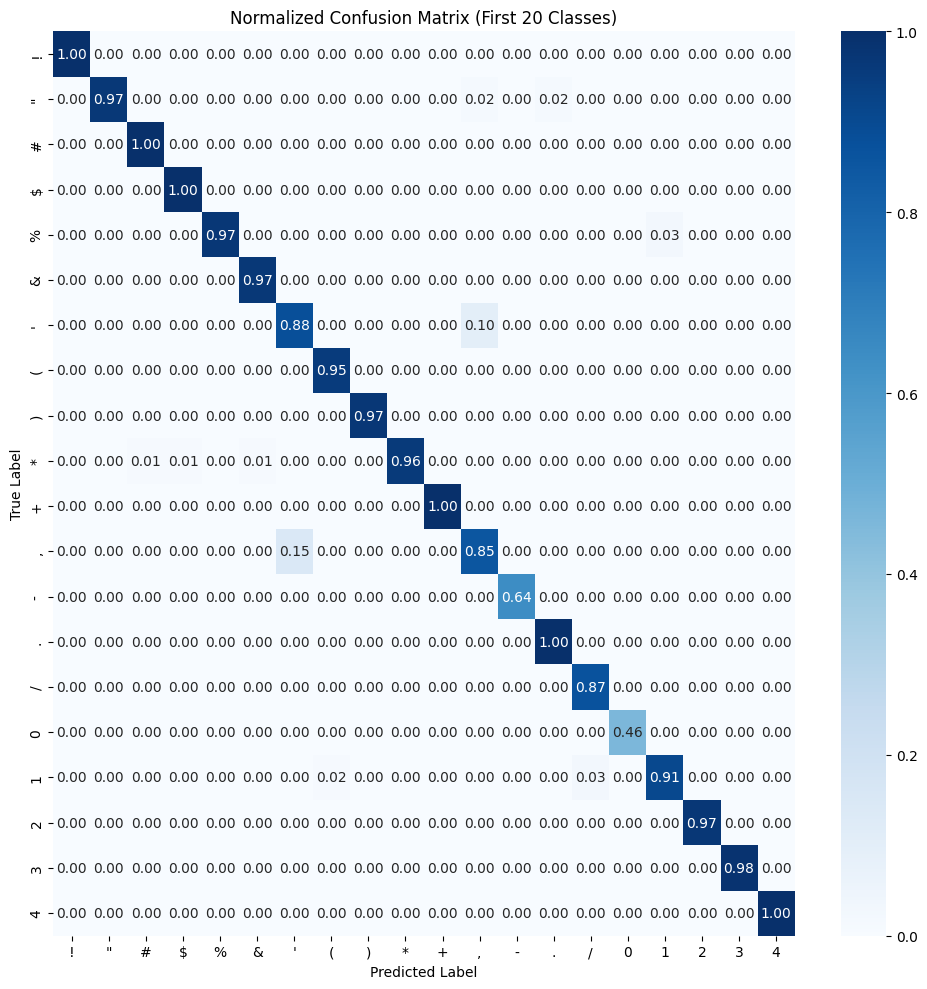

In [30]:
# Plot confusion matrix for the first 20 classes
plt.figure(figsize=(10, 10))
cm = confusion_matrix(y_true_classes, y_pred_classes)
# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Select the first 20 classes for visualization
cm_norm_20 = cm_norm[:20, :20]
sns.heatmap(cm_norm_20, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=label_encoder.classes_[:20],
            yticklabels=label_encoder.classes_[:20])
plt.title('Normalized Confusion Matrix (First 20 Classes)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

## 9. Visualizing Results <a name="visualizing-results"></a>

Let's visualize our model's training progress and predictions:

In [31]:
# Choose a random sample of test images
sample_indices = np.random.choice(len(X_test), 25, replace=False)
X_sample = X_test[sample_indices]
y_true_sample = y_true_classes[sample_indices]
y_pred_sample = y_pred_classes[sample_indices]

In [32]:
# Visualize predictions on a sample of test images
def plot_predictions(X, y_true, y_pred, n_samples=25):
    """
    Visualize model predictions against ground truth
    
    Args:
        X: Input images
        y_true: True class indices
        y_pred: Predicted class indices
        n_samples: Number of samples to display
    """
    plt.figure(figsize=(15, 15))
    for i in range(n_samples):
        plt.subplot(5, 5, i+1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        
        true_label = idx_to_char[y_true[i]]
        pred_label = idx_to_char[y_pred[i]]
        
        title_color = 'green' if true_label == pred_label else 'red'
        plt.title(f"True: {true_label}\nPred: {pred_label}", color=title_color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

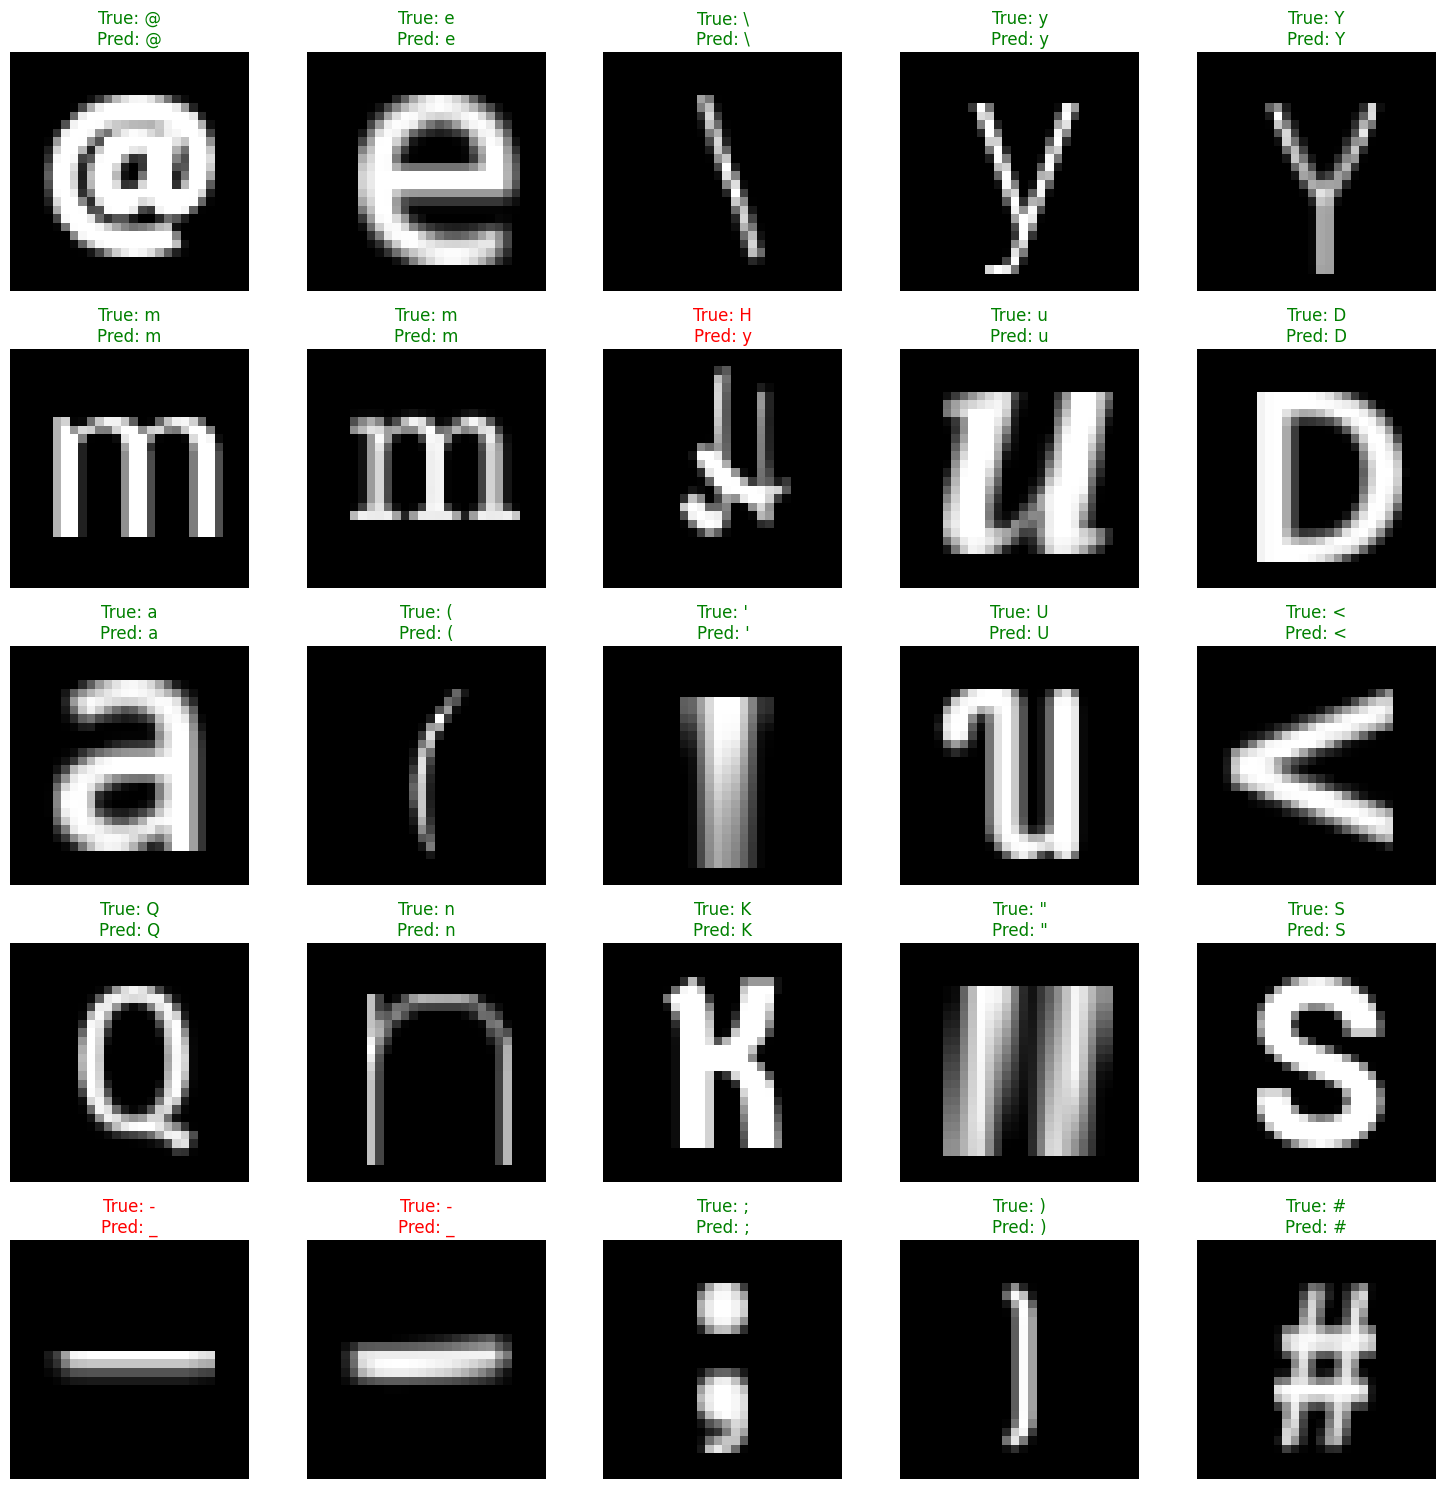

In [33]:
# Plot predictions
plot_predictions(X_sample, y_true_sample, y_pred_sample, n_samples=25)

In [34]:
# Analyze difficult characters (most commonly confused)
def find_difficult_chars(y_true, y_pred, idx_to_char_map, top_n=10):
    """
    Find the most commonly confused characters
    
    Args:
        y_true: True class indices
        y_pred: Predicted class indices
        idx_to_char_map: Mapping from indices to characters
        top_n: Number of difficult pairs to return
        
    Returns:
        DataFrame of most confused character pairs
    """
    # Create confusion pairs
    confusion_pairs = [(idx_to_char_map[true], idx_to_char_map[pred]) 
                        for true, pred in zip(y_true, y_pred) if true != pred]
    
    # Count occurrences of each confusion pair
    confusion_counts = pd.Series(confusion_pairs).value_counts().reset_index()
    confusion_counts.columns = ['Confusion_Pair', 'Count']
    
    # Split pairs into true and predicted columns
    confusion_counts['True_Char'] = confusion_counts['Confusion_Pair'].apply(lambda x: x[0])
    confusion_counts['Pred_Char'] = confusion_counts['Confusion_Pair'].apply(lambda x: x[1])
    
    return confusion_counts[['True_Char', 'Pred_Char', 'Count']].head(top_n)

The find_difficult_chars function identifies and analyzes the character pairs that our model most commonly confuses. This analysis helps us understand the model's limitations and provides insights for potential improvements.

The function works by:
1. Creating a list of (true_char, predicted_char) tuples for all misclassified examples
2. Counting how frequently each confusion pair occurs using pandas Series value_counts()
3. Reformatting the results into a clear DataFrame with 'True_Char', 'Pred_Char', and 'Count' columns
4. Returning the top N most common confusion pairs

This analysis reveals which characters share visual similarities that challenge our model. For example, we might find that visually similar character pairs like '0'/'O', 'l'/'1', or 'z'/'Z' are frequently confused. These insights could guide targeted improvements through data augmentation or model architecture changes to better distinguish these problematic character pairs.

In [35]:
# Find and display the most difficult characters
difficult_chars = find_difficult_chars(y_true_classes, y_pred_classes, idx_to_char, top_n=15)
print("Most Commonly Confused Characters:")
print(difficult_chars)

Most Commonly Confused Characters:
   True_Char Pred_Char  Count
0          w         W     48
1          0         O     25
2          v         V     24
3          -         _     23
4          I         |     19
5          x         X     17
6          \         |     13
7          l         |     13
8          I         l     13
9          s         S     13
10         z         Z     12
11         o         O     11
12         p         P     10
13         ,         '      9
14         |         l      8


#### Insights
1. **Case Sensitivity**: Lowercase/uppercase pairs (w/W, v/V, z/Z) are frequently confused

2. **Visually Similar Characters**: Zero/letter O confusion and characters with minimal distinguishing features (I/l) are problematic 

3. **Consistent Pattern**: Gradual decrease in confusion counts suggests systematic challenges with certain character types rather than isolated issues

4. **Improvement Opportunity**: These patterns highlight specific areas where focused data augmentation or model adjustments could improve performance

Examples where 'w' was mistaken for 'W':


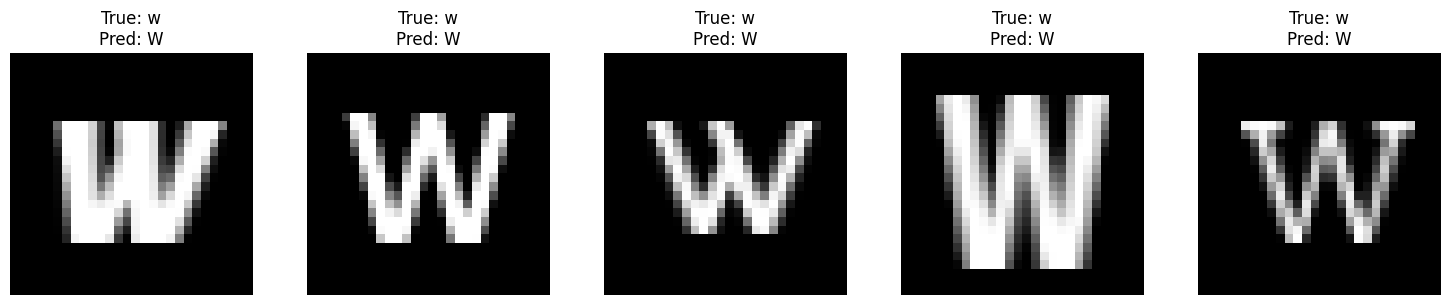

In [36]:
# Visualize examples of the most confused pairs
def plot_confused_examples(X, y_true, y_pred, true_char, pred_char, 
                          char_to_idx_map, n_samples=5):
    """
    Plot examples of confused pairs
    
    Args:
        X: Input images
        y_true: True class indices
        y_pred: Predicted class indices
        true_char: The true character to look for
        pred_char: The predicted character (incorrect prediction)
        char_to_idx_map: Mapping from characters to indices
        n_samples: Number of examples to show
    """
    # Get indices of samples where true_char was mistaken for pred_char
    true_idx = char_to_idx_map[true_char]
    pred_idx = char_to_idx_map[pred_char]
    
    confused_indices = np.where((y_true == true_idx) & (y_pred == pred_idx))[0]
    
    if len(confused_indices) == 0:
        print(f"No instances found where '{true_char}' was mistaken for '{pred_char}'")
        return
    
    # Select up to n_samples
    sample_count = min(n_samples, len(confused_indices))
    selected_indices = confused_indices[:sample_count]
    
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(selected_indices):
        plt.subplot(1, sample_count, i+1)
        plt.imshow(X[idx].reshape(28, 28), cmap='gray')
        plt.title(f"True: {true_char}\nPred: {pred_char}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot examples of the top confused pair
if len(difficult_chars) > 0:
    top_confused = difficult_chars.iloc[0]
    true_char = top_confused['True_Char']
    pred_char = top_confused['Pred_Char']
    
    print(f"Examples where '{true_char}' was mistaken for '{pred_char}':")
    plot_confused_examples(X_test, y_true_classes, y_pred_classes, 
                          true_char, pred_char, char_to_idx, n_samples=5)

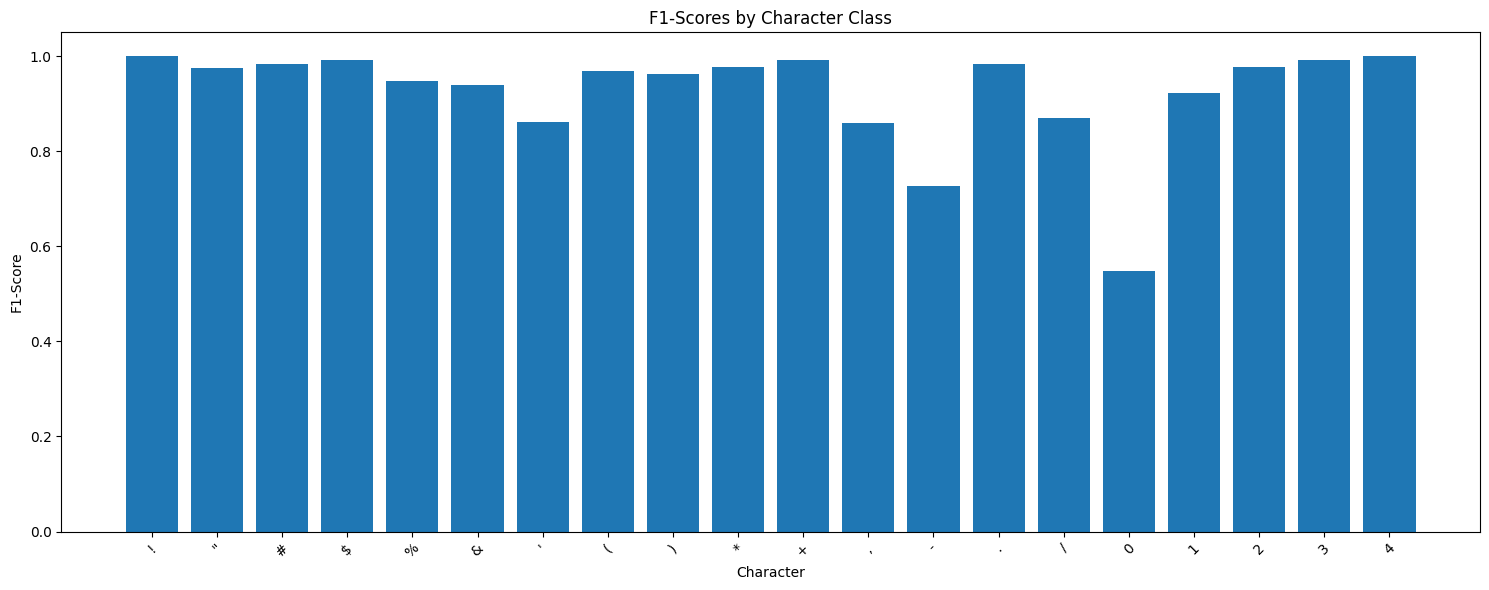

In [37]:
# Get F1-scores from classification report
f1_scores = pd.DataFrame(report).transpose()['f1-score']

# Select a subset of classes to visualize (e.g., first 20)
selected_classes = f1_scores.iloc[:20]

# Plot bar chart
plt.figure(figsize=(15, 6))
plt.bar(selected_classes.index, selected_classes.values)
plt.title('F1-Scores by Character Class')
plt.xlabel('Character')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 11. Conclusion

In this tutorial, we've successfully built a deep learning solution for the TMNIST Alphabet (94 characters) classification problem. Our model achieved 90.87% accuracy on the test dataset, exceeding the 90% threshold required for this complex multi-class problem.

Through this project, we've covered several important aspects of deep learning for image classification:

1. **Data Understanding and Preprocessing**: We explored the TMNIST Alphabet dataset containing 94 different typographic characters. We preprocessed the data through normalization, reshaping, and augmentation to enhance model generalization.

2. **CNN Architecture Design**: We implemented a convolutional neural network architecture specifically designed for character recognition, with multiple convolutional layers, batch normalization, and dropout regularization to prevent overfitting.

3. **Mathematical Foundation**: We explained the key mathematical concepts underlying CNNs, including convolution operations, activation functions, pooling, batch normalization, and categorical cross-entropy loss.

4. **Effective Training**: Our training approach with data augmentation and appropriate callbacks produced excellent results, with the model learning to distinguish between visually similar characters.

5. **Performance Analysis**: The model showed impressive performance metrics across character classes, with many achieving F1-scores above 0.95. Our visualization of class-wise F1-scores and the confusion matrix provided insights into the model's strengths and limitations.

The high accuracy and F1-scores across most character classes demonstrate that CNNs are well-suited for typographic character recognition tasks. Our model effectively learned the distinguishing features of different characters despite the challenging nature of classifying 94 different classes.

These results highlight the power of deep learning approaches for computer vision tasks and provide a solid foundation for more complex OCR (Optical Character Recognition) applications. The techniques presented in this tutorial can be extended to other image classification problems with appropriate modifications.

For future improvements, one could explore more advanced architectures like residual networks (ResNet) or attention mechanisms, implement transfer learning from pre-trained models, or develop techniques to improve performance on the few character classes that showed lower F1-scores.

## References:

1. Chollet, F. (2021). *Deep Learning with Python* (2nd ed.). Manning Publications. ISBN: 978-1617296864.

2. LeCun, Y., Cortes, C., & Burges, C. J. C. (1998). *The MNIST Database of Handwritten Digits*. Retrieved from http://yann.lecun.com/exdb/mnist/

3. Géron, A. (2022). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems* (3rd ed.). O'Reilly Media. ISBN: 978-1098125974.

4. Gulli, A., Kapoor, A., & Pal, S. (2019). *Deep Learning with TensorFlow 2 and Keras: Regression, ConvNets, GANs, RNNs, NLP, and more with TensorFlow 2 and the Keras API* (2nd ed.). Packt Publishing. ISBN: 978-1838823412.

5. Brownlee, J. (2021). "How to Develop a Convolutional Neural Network From Scratch for MNIST Handwritten Digit Classification." *Machine Learning Mastery*. Retrieved from https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

End of notebook